<div class="alert alert-block alert-info">
Nanyang Technological University<br>
<i>CZ1115 Data Science and Artifical Intelligence</i>, 20/21 Sem 2

FS5 - Movie Database<br>
Group 5 <br>    
Koh Jia Cheng (C200172@e.ntu.edu.sg)<br>
Darren Chan Inn Siew (DCHAN0525@e.ntu.edu.sg)<br>
Ameeshi Gupta (AMEESHI001@e.ntu.edu.sg)<br>
</div>

# CZ1115 Movie Project

>### Table of Contents
>
>- Introduction - Problem Set
>- Dataset Extraction and Curation
>    - Data Extraction via themoviedb API, stored to local csv file
>    - Importing Movie Data
>    - Test For Duplicates/Null Values
>    - Renaming and Dropping columns
>    - Data Extraction of US Inflation Rate
>-  Data Preparation and Cleaning
    - Creation of Sub-Group (Genre, Profit, Profit_margin, Release Date)
    - Inflation Adjustment to Budget, Revenue
    - Reorder and Renaming Columns
    - Removal of Data Beyond 2020
    - Check for Abnormal Budget, Runtime, Revenue
    - Compute VAR for Cast, Director and Production
>-  Exploratory data analysis/visualization to gather relevant insights
>    - Visual Analysis - Histogram - General Distribution
>    - Q1 - Growth Rate of the Film Industry
>    - Q2 - What is the appropriate Budget for a Profitable Film
>    - Q3 - Is there an optimal release date to maximise a Film's Profit.
>    - Q4 - What are the popular Genres for a Profitable Film.
>    - Q5 - Does the Popularity and Ratings of a Film correlate with Profitability.
>    - Q6 - Does the duration of a Film affects it's Profitability.
>    - Q7 - How does the Cast, Director and Production Studio affects the Profitability of a Film
>-   Machine Learning
>    - Visual Analysis - Proportion of Profitable Films
>    - Generating Dummy Variables for Logistic Regression
>    - Train-Test-Split and Applying RFEVC
>    - Comparison of Accuracy Score - Cross Validation
>    - Fitting of Logistic Regression Model
>    - Receiver Operating Characteris (ROC) Curve
>    - Interpertion of Result.
>- Conclusion
>- References

## 1 Introduction - Problem Set
The Film Industry comprises the technological and commercial institutions of filmmaking. Meanwhile, the commerical success of a Film has a number of attributes that we can measure. The attributes in our dataset are: `budget`, `revenue`, `profit`, `profit_margin`, `production`, `genre_1`, `genre_2`, `genre_combo`, `popularity`, `rating`, `runtime`, `cast`, `director`, `day`, `month`, `year`, `day_of_week`, `avg_cast_var`, `director_var` and `production_var`. 

In this project, we will step into an investor's point of view to determine if the Film Industry is worth investing in and analysis what factors contributes to the profitability of a Film.

Some of the questions we will be addressing are as follow:

> 1. Is the Film Industry Growing?
> 2. What is an appropriate Budget for a Profitable Film?
> 3. When is an optimal Month/ Day to release a Film's Profit.
> 4. What are the popular Genres for a Profitable Film.
> 5. Do the Popularity and Ratings of a Film correlate with Profitability.
> 6. Does the duration of a Film affects it's Profitability.
> 7. How does the Cast, Director and Production Studio affects the Profitability of a Film

Lastly, we seek to find a ***model*** to determine the Probability of a Film's Success using the attributes of Film. Hence, allowing investors to focus on certain attributes to increase odds of profitability.

Here is a brief description of the variables

|Column name|<p align="left"> Explanation|Data type|
|:---:|:---:|:---:
|budget|<p align="left"> production budget adjusted with inflation rate | float |
|revenue| <p align="left"> gross revenue adjusted with inflation rate| float |
|profit| <p align="left"> production profit since release date| float |
|profit_margin| <p align="left"> relative profit of a film| float |
|profitable| <p align="left"> binary 0/1 whether a film has profit| float |
|production|<p align="left"> production studio | object |
|genre_1| <p align="left"> primary genre | object |
|genre_2| <p align="left"> secondary genre | object |
|genre_combo| <p align="left"> combination of genres | object |
|popularity| <p align="left"> popularity of the film | float | 
|rating| <p align="left"> average vote casted for the film | float |
|runtime| <p align="left"> duration of film | float |
|cast| <p align="left"> name list of actors and actress | object |
|director| <p align="left"> film director's name | object |
|day_of_week| <p align="left"> day of the week | float |
|day| <p align="left"> day of release | int |
|month| <p align="left"> month of release | int |
|year| <p align="left"> year of release | int|
|avg_cast_var| <p align="left"> Average Casting Crew VAR | float |
|director_var| <p align="left"> Director's VAR | float |
|production_var| <p align="left"> Production Studio's VAR| float |

*VAR = Value Above Replacement. 
For example, the Director_VAR is calculated by taking the Average Profit of all his/her Films over the Average Profit of the Dataset. By doing so, we find out the Cast, Director and Production stands in the Film Industry.*

## 2 Dataset Extraction and Curation
* Data Pulling
* Import movie data
* Test for missing values
* Test for numerical attributes (they should all be numerical in nature)

### Data Pulling and Storing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.core.display import HTML as Center
import requests, csv, ast, sys, json, warnings
# Personal Library (For Data Pulling and Misc)

import secret_lab
%matplotlib inline
sb.set(style='white')
sb.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Centralise All Graph Output 
Center(""" <style>.output_png {display: table-cell; text-align: center; vertical-align: middle;}</style> """)

### Movie Database Data Pull

In [2]:
# The code for Storage and API call is in secret_lab.py
# The saved file named is changed to movie_data_new to prevent accidentally replace our main dataset.
api_key = "02c6c5c29cd2591b955bdb5d1ce8c448"
#secret_lab.get_movie_list(api_key)

### Set-up Column Name

In [3]:
movie_extract = (json.loads((requests.get("https://api.themoviedb.org/3/movie/{mov_id}?api_key={key}".format(mov_id = 550, key = api_key)).content))).keys()
df_columns = ['placeholder']
df_columns.extend(list(movie_extract))
df_columns.extend(['cast', 'director'])

### Import Movie CSV

In [4]:
# Display the raw data drawn
df = pd.read_csv("movie_data.csv", error_bad_lines= False, names = df_columns, warn_bad_lines=True, lineterminator='\n')
df.head(n = 1)

,placeholder,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,director
0,0,FALSE,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,374.029,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",24/4/19,2.797801e+09,181.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Part of the journey is the end.,Avengers: Endgame,False,8.3,17611.0,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",Anthony Russo\r


### Replace \r strings to NULL

In [5]:
df = df.replace('\r', '', regex = True)
df = df.replace('\\[]', '' , regex = True)
df = df.replace(r'^\s*$', np.nan, regex = True)

### Check Data Shape and for Duplicated Data

In [6]:
# Check Shape of Dataset
print("Dataset Shape:",df.shape)

Dataset Shape: (9992, 28)


In [7]:
print("Number of Duplicated Rows:", sum(df.duplicated()))

Number of Duplicated Rows: 0


### Renaming and Dropping of  Columns

In [8]:
# Drop Columns That we don't need: adult, backdrop_path, belongs_to_collection, imdb_id, overview, poster_path, production_countries, status, tagline, original_title, video
df_movie = df.drop(df.columns[[0, 1, 2, 3, 6, 8, 9, 10, 11, 13, 15, 19, 20, 21, 23, 25]], axis= 1)

# Prevent Memory Hogging
del df

### Test for missing values
A quick peek with the following observations
- There are many Films that lack the attributes we need, such as Genres, Director, Production_Companies
- Variables such as Genre, Release_date requires some cleaning for easier data exploration

In [9]:
# Check for any null value
df_movie.isnull().sum()

budget                    1
genres                   92
id                        0
popularity                1
production_companies    460
release_date             39
revenue                   2
runtime                  28
title                     2
vote_average              2
cast                     55
director                 86
dtype: int64

### Drop null rows

In [10]:
df_movie = df_movie.dropna()





### Removal of Movie with Duplicated ID

In [11]:
duplicates = df_movie[df_movie.id.duplicated() == True].index

print("Duplicated Movies:", duplicates)

for i in duplicates:
    df_movie = df_movie.drop(df_movie[df_movie.id.duplicated() == True].index[i])
    
print("After Removal - Duplicated Movies:", df_movie[df_movie.id.duplicated() == True].index)

Duplicated Movies: Int64Index([], dtype='int64')
After Removal - Duplicated Movies: Int64Index([], dtype='int64')


### Data Types

In [12]:
# Converting Release Date into Date Time Object
df_movie['release_date'] = pd.to_datetime(df_movie['release_date'])
df_movie.dtypes

budget                          object
genres                          object
id                               int64
popularity                      object
production_companies            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
title                           object
vote_average                   float64
cast                            object
director                        object
dtype: object

### Data Pulling of US Inflation Rate
* Our dataset variable "Revenua" and "Budget" are in US Currency, and multiple Films are made in early 20th Century.
* Hence, Adjustment for Inflation is required, otherwise the revenue generated from films in 1990s will be **much lower** than 2010s.

In [13]:
inflation_df = pd.read_html("https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi")[1]['U.S. Inflation Rate - Historical Data']
inflation_df['Inflation Rate (%)'] = inflation_df['Inflation Rate (%)'].str.extract(r"(.*?)(?=%)").astype('float') + 100

#### Function: Return Adjustment to Inflation

In [14]:
def get_inflated(budget, year):
    rates = inflation_df[inflation_df['Year'] > year]['Inflation Rate (%)'].tolist()
    placed = 1
    for i in rates:
        placed = (placed * i) / 100
    return (placed * float(budget))

## 3 Data Preparation and Cleaning
* Create new columns `genre_1` and `genre_2` from Genre extraction.
* Create new columns `day`, `month`, `year`, `day_of_week` from release_date.
* Create new columns `profit`, `profit_margin`, `profitable`.
* Create new columns `avg_cast_var`, `director_var`, `production_var`.
* Reorder, Renaming, Dropping of columns.

### Extract Genres from Raw Data

In [15]:
# Take the Top 2 Genre of the Film
def extract_name(x):
    if(x):
        hold = ""
        for i in x:
            hold += i['name'] + " "
        return hold

df_movie['genres'] = df_movie['genres'].apply(ast.literal_eval)
df_movie['genres'] = df_movie['genres'].apply(extract_name)
df_movie[['genre_1', 'genre_2']] = df_movie['genres'].str.split(' ', 1, expand = True)
df_movie['genre_2'] = df_movie['genre_2'].apply(lambda x: x.split(' ')[0] if x else np.NaN)

### Unique Combination of Genres
* An unique combination of genres is needed as there are overlapping of genres as of now
* Removal of Redundant Genre "Movie", "Friction", "TV" as there is only 1 unique primary genre for the two.

In [16]:
ac_ad = df_movie[(df_movie['genre_1'] == 'Action') & (df_movie['genre_2'] == 'Adventure')].count()[0]
ad_ac = df_movie[(df_movie['genre_1'] == 'Adventure') & (df_movie['genre_2'] == 'Action')].count()[0]
print("Before Cleaning:")
print("Genre Count - Action & Adventure:", ac_ad)
print("Genre Count - Adventure & Action:", ad_ac)

Before Cleaning:
Genre Count - Action & Adventure: 347
Genre Count - Adventure & Action: 111


In [17]:
# List of Genres 1 and Genres 2
genre_1 = df_movie['genre_1'].value_counts().index.sort_values()
genre_2 = df_movie['genre_2'].value_counts().index.sort_values()
genre_1 = df_movie['genre_1'].value_counts().index.sort_values().drop('TV')
genre_2 = df_movie['genre_2'].value_counts().index.sort_values().drop(['Movie', 'TV', 'Fiction'])

In [18]:
# Swapping the Matrix
for i in range(len(genre_1)):
    for j in range(len(genre_2)):
        if j > i:
            df_movie.loc[((df_movie.genre_1 == genre_1[i]) & (df_movie.genre_2 == genre_2[j])), 'genre_2'] = genre_1[i]
            df_movie.loc[((df_movie.genre_1 == genre_1[i]) & (df_movie.genre_2 == genre_1[i])), 'genre_1'] = genre_2[j]

In [19]:
ac_ad = df_movie[(df_movie['genre_1'] == 'Action') & (df_movie['genre_2'] == 'Adventure')].count()[0]
ad_ac = df_movie[(df_movie['genre_1'] == 'Adventure') & (df_movie['genre_2'] == 'Action')].count()[0]
print("After Cleaning:")
print("Genre Count - Action & Adventure:", ac_ad)
print("Genre Count - Adventure & Action:", ad_ac)

After Cleaning:
Genre Count - Action & Adventure: 0
Genre Count - Adventure & Action: 458


In [20]:
df_movie.drop(df_movie[(df_movie.genre_1 == 'Movie') | (df_movie.genre_1 == 'TV')].index, inplace=True)
df_movie.drop(df_movie[(df_movie.genre_2 == 'Movie') | (df_movie.genre_2 == 'TV')].index, inplace=True)

### Take the Top Production Company for the film

In [21]:

df_movie['production_companies'] = df_movie['production_companies'].apply(ast.literal_eval)
df_movie['production_companies'] = df_movie['production_companies'].apply(extract_name)

### Convert Casting into List Type

In [22]:
df_movie['cast'] = df_movie['cast'].apply(ast.literal_eval)

### Release Date

In [23]:
df_movie['year'] = df_movie['release_date'].dt.year
df_movie['month'] = df_movie['release_date'].dt.month
df_movie['day']   = df_movie['release_date'].dt.day
df_movie['day_of_week'] = df_movie['release_date'].dt.dayofweek

### Adjustment to Budget and Revenue base on Inflation

In [24]:
df_movie['adjusted_budget'] = df_movie.apply(lambda x: get_inflated(x['budget'], x['year']), axis = 1)
df_movie['adjusted_revenue'] = df_movie.apply(lambda x: get_inflated(x['revenue'], x['year']), axis = 1)

df_movie['budget'] = df_movie['adjusted_budget']
df_movie['revenue'] = df_movie['adjusted_revenue']

### Reorder and Renaming Columns

In [25]:
df_mov = df_movie[['id', 'title', 'production_companies', 'genre_1', 'genre_2',
                  'budget', 'revenue', 'popularity', 'vote_average', 'runtime', 'year', 'month', 'day', 'day_of_week', 'cast', 'director']]

df_mov.rename({'production_companies': 'production', 'vote_average': 'rating'}, axis=1, inplace=True)
del df_movie

### Removal of data after 2020
* Data for Movies past 2020 are incomplete

In [26]:
df_mov = df_mov[(df_mov['year'] <= 2020)]

### Check for Zero value for Revenue and Budget and Low Budget as well as Abnormally Huge Budget
* The extracted Movies are Top 10,000 in Revenue, hence Revenue and Budget shouldn't be of Zero Value.
* Based on Google Reference, an average Film Budget is 40 million, but we will be filter to above 100,000
* Based on Wikipedia, the most expensive film to be made is 430 million, adjusted with inflation.
* Revenue and Budget are key attributes in our research to measure Success of a movie

In [27]:
pd.read_html("https://en.wikipedia.org/wiki/List_of_most_expensive_films")[2].head(1)

Rank                                        Title  Year  \
  Rank                                        Title  Year   
0  1.0  Pirates of the Caribbean: On Stranger Tides  2011   

  Cost (est.) (millions)          Refs and notes  
                Adjusted  Nominal Refs and notes  
0                   $430  *$378.5      [1][nb 1]

#### Sanity Check with Inflation Rate

In [28]:
df_mov[df_mov['title'] == 'Pirates of the Caribbean: On Stranger Tides']['budget']

36    4.318450e+08
Name: budget, dtype: float64

In [29]:
# Search Films with have no Budget, no Revenue Revenue, Abnormally high budget and zero runtime
# Films with less than 100,000 budget will be filtered out.
zero = df_mov[(df_mov['revenue'] == 0) | (df_mov['budget'] < 100000) | 
              (df_mov['budget'] > 440000000) |(df_mov['runtime'] == 0)]
zero.count()

id             2552
title          2552
production     2552
genre_1        2552
genre_2        1883
budget         2552
revenue        2552
popularity     2552
rating         2552
runtime        2552
year           2552
month          2552
day            2552
day_of_week    2552
cast           2552
director       2552
dtype: int64

In [30]:
# Remove these data
df_mov = df_mov[~df_mov.index.isin(zero.index)]
((df_mov['revenue'] == 0) | (df_mov['budget'] == 0 | (df_mov['budget'] > 430000000))).value_counts()
del zero

### Profit and Profit Margin
* Profit and Profit Margin will be using the Adjusted Budget and Adjusted Revenue
* New Column Profit, Profit_Margin, Profitable (0/1)

In [31]:
df_mov['profit'] = df_mov['revenue'] - df_mov['budget']
df_mov['profit_margin'] =(df_mov['profit'] / df_mov['revenue']).round(3)
df_mov['profitable'] = np.where((df_mov['profit'] > 0), 1, 0)
df_mov['profit_margin'].describe()

count    6381.000000
mean       -0.552241
std         4.359029
min       -95.655000
25%        -0.149000
50%         0.510000
75%         0.758000
max         0.999000
Name: profit_margin, dtype: float64

### Popularity

In [32]:
df_mov['popularity'] = df_mov['popularity'].fillna("0")
df_mov['popularity'] = df_mov['popularity'].astype("float")

### Average Actor Value Over Replacement
* Calculate individual Actor's Average Film Profit and compare against Mean Profit
* Next, compiled the Film's Average Actor's Vars

In [33]:
# Extract all Actors/Actresses from DataFrame
actors_list = []

for index, row in df_mov.iterrows():
    for actor in row['cast']:
        actors_list.append({"actor": actor, "avg_profit": row['profit'], 'year': row['year']})
        
df_cast = pd.DataFrame(actors_list).groupby("actor").mean()
df_cast['cast_var'] = (df_cast['avg_profit'] / df_mov['profit'].mean()).round(4)

for index, row in df_mov.iterrows():
    no_of_cast = len(row['cast']) if len(row['cast']) else 1
    cast_vars = 0
    for actor in row['cast']:
        cast_vars += df_cast.loc[actor]['cast_var']
    df_mov.at[index,'avg_cast_var'] = cast_vars

### Average Director Value Over Replacement
* Calculate Director's Average Film Profit and compare against Mean Profit

In [34]:
director_list = []

for index, row in df_mov.iterrows():
    director_list.append({"director": row['director'], "avg_profit": row['profit'], 'year': row['year']})
        
df_dir = pd.DataFrame(director_list).groupby("director").mean()
df_dir['director_var'] = (df_dir['avg_profit'] / df_mov['profit'].mean()).round(4)
df_dir.reset_index(inplace = True)

for index, row in df_dir.iterrows():
    df_mov.loc[df_mov.director == row['director'], 'director_var'] =  row['director_var']

### Average Production Value Over Replacement
* Calculate Production's Average Film Profit and compare against Mean Profit

In [35]:
production_list = []

for index, row in df_mov.iterrows():
    production_list.append({"production": row['production'], "avg_profit": row['profit'], 'year': row['year']})
        
df_prod = pd.DataFrame(production_list).groupby("production").mean()
df_prod['production_var'] = (df_prod['avg_profit'] / df_mov['profit'].mean()).round(4)
df_prod.reset_index(inplace = True)

for index, row in df_prod.iterrows():
    df_mov.loc[df_mov.production == row['production'], 'production_var'] =  row['production_var']

### Data Types

In [36]:
#sanity check
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6381 entries, 0 to 9989
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6381 non-null   int64  
 1   title           6381 non-null   object 
 2   production      6381 non-null   object 
 3   genre_1         6381 non-null   object 
 4   genre_2         5364 non-null   object 
 5   budget          6381 non-null   float64
 6   revenue         6381 non-null   float64
 7   popularity      6381 non-null   float64
 8   rating          6381 non-null   float64
 9   runtime         6381 non-null   float64
 10  year            6381 non-null   int64  
 11  month           6381 non-null   int64  
 12  day             6381 non-null   int64  
 13  day_of_week     6381 non-null   int64  
 14  cast            6381 non-null   object 
 15  director        6381 non-null   object 
 16  profit          6381 non-null   float64
 17  profit_margin   6381 non-null   f

In [37]:
df_mov.describe()

,id,budget,revenue,popularity,rating,runtime,year,month,day,day_of_week,profit,profit_margin,profitable,avg_cast_var,director_var,production_var
count,6381.000000,6.381000e+03,6.381000e+03,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6.381000e+03,6381.000000,6381.000000,6381.000000,6381.000000,6381.00000
mean,107327.141044,4.128225e+07,1.238322e+08,22.605989,6.371729,111.171133,2004.144335,6.777621,15.400251,3.109231,8.254996e+07,-0.552241,0.714935,8.978285,0.999999,1.00000
std,154708.519484,4.897617e+07,2.262638e+08,55.280029,0.994775,21.716790,11.171547,3.495529,8.433678,1.572933,1.977840e+08,4.359029,0.451481,9.257214,1.623919,2.23024
min,5.000000,1.000000e+05,3.344766e+05,0.600000,0.000000,26.000000,1971.000000,1.000000,1.000000,0.000000,-1.818445e+08,-95.655000,0.000000,-6.641300,-1.309600,-2.20280
25%,9659.000000,8.136968e+06,1.001224e+07,9.102000,5.900000,96.000000,1997.000000,4.000000,9.000000,2.000000,-1.430261e+06,-0.149000,0.000000,3.192100,0.049000,0.00000
50%,21879.000000,2.383144e+07,4.118141e+07,13.577000,6.400000,107.000000,2007.000000,7.000000,15.000000,3.000000,1.468194e+07,0.510000,1.000000,7.373900,0.433200,0.23850
75%,152603.000000,5.413366e+07,1.338365e+08,22.498000,7.000000,122.000000,2013.000000,10.000000,22.000000,4.000000,8.450000e+07,0.758000,1.000000,11.865500,1.313500,1.03930
max,790037.000000,4.318450e+08,3.483999e+09,2136.261000,10.000000,339.000000,2020.000000,12.000000,31.000000,6.000000,3.224638e+09,0.999000,1.000000,183.384600,15.346500,38.34600


## 3 Exploratory data analysis/visualization to gather relevant insights

### Visual Analysis - Histogram - General Distribution

------------------------------------------------- Histogram (General) -----------------------------------------------


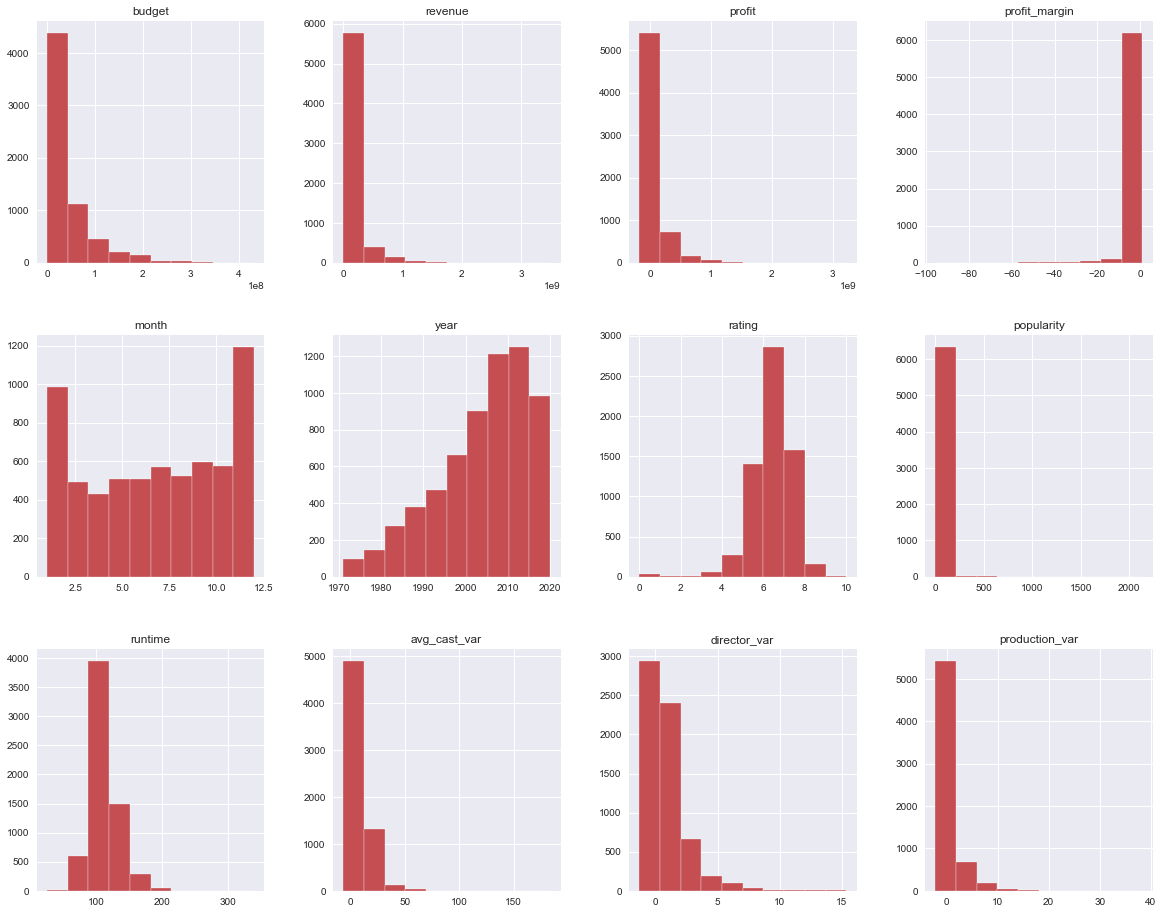

In [38]:
with plt.style.context('seaborn'):
    print("------------------------------------------------- Histogram (General) -----------------------------------------------")
    df_mov[['budget', 'revenue', 'profit', 'profit_margin', 
                      'month', 'year', 
                      'rating', 'popularity','runtime', 'avg_cast_var', 'director_var', 'production_var'
                     ]].hist(layout=(3,4), figsize=(20,16), facecolor='r')
    
plt.show()

#### Based on a visual observation we noted the following:
1. Most movies have runtime in the range of 50 to 200 Minutes
2. Most movies are released from 2005 to 2020
3. Most movies are released in range of January and Decemeber
4. Popularity can't really be determined yet, as there is no proper gadge
5. Average Vote Rating is 6 ~ 7
6. Distribution of Revenue, Budget, Profit are heavily skewed

## Q1. Is the Film Industry Growing?
> * Is there a Market for Film Making before we explore even further..
* Visual Analysis - Number of Top Films Released since 1970s and corresponding Revenue

### Visual Analysis - Number of Top Films Released since 1970s and corresponding Revenue

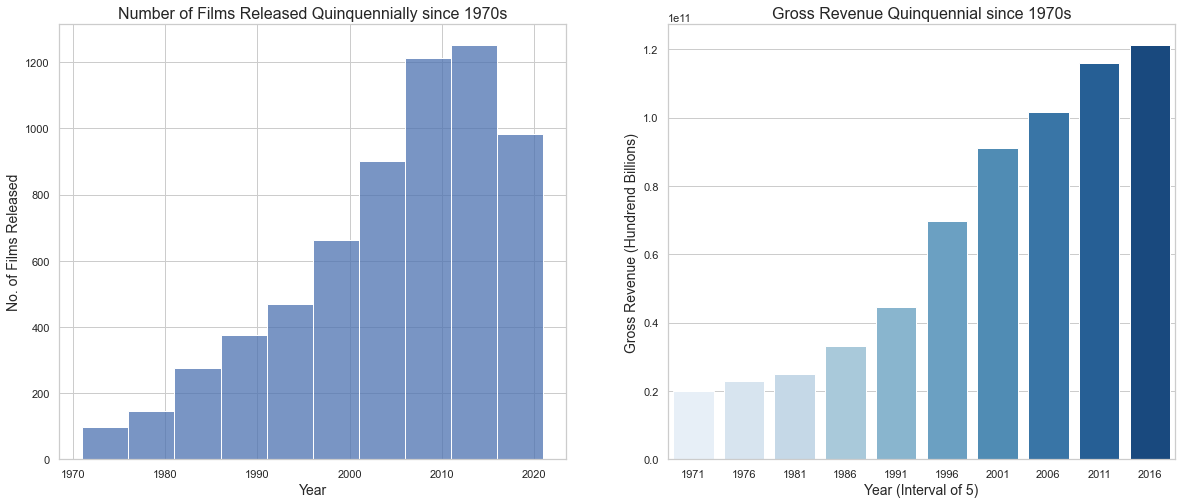

In [39]:
f, axes = plt.subplots(1,2, figsize = (20,8))

# No. of Movies Released: Interval of 5 Years
sb.histplot(data = df_mov, x = 'year', ax = axes[0], binwidth = 5)
axes[0].set_title("Number of Films Released Quinquennially since 1970s", fontsize = 16)
axes[0].set_xlabel("Year", fontsize = 14)
axes[0].set_ylabel("No. of Films Released", fontsize = 14)

# Gross Revenue: Interval of 5 Years
rev_interval = df_mov.groupby(['year'])['revenue'].sum().to_frame().reset_index()
turns = int((2020 - 1970) / 5)
dicit = []

for i in range(turns):
    start = 5 * i
    sums = int(rev_interval[start: start + 4]['revenue'].sum().round())
    dicit.append({"year": int(rev_interval.iloc[start]['year']), "revenue": sums})

df_rev_inter = pd.DataFrame(dicit)
sb.barplot(data = df_rev_inter, x = 'year', y = 'revenue', ax = axes[1], palette = 'Blues')

axes[1].set_title("Gross Revenue Quinquennial since 1970s", fontsize = 16)
axes[1].set_xlabel("Year (Interval of 5)", fontsize = 14)
axes[1].set_ylabel("Gross Revenue (Hundrend Billions)", fontsize = 14)

# Don't Hog up the memory usage
del df_rev_inter

#### Based on a visual observation we noted the following:
1. The Film Industry is growing stronger annually, having more Gross Revenue and Films produced.
2. Even with the Pandemic, 2016 ~ 2020 Gross Revenue still exceeded previous years.

### Conclusion
* There is definitely a Market for Film Making.
* Now, we will be focusing on Film released in the past 20 years to analysis the growing trend.

In [40]:
df_mov = df_mov[df_mov['year'] > 2000]

## Q2. What is the appropriate Budget for a Profitable Film
> - Visual Analysis - Budget, Revenue, Profit and Margin
> - Correlation Analysis - Budget vs Profit - Profitable Movies
> - Correlation Analysis - Budget vs Profit Margin - Profitable Movies

### Visual Analysis - Budget, Revenue, Profit and Margin

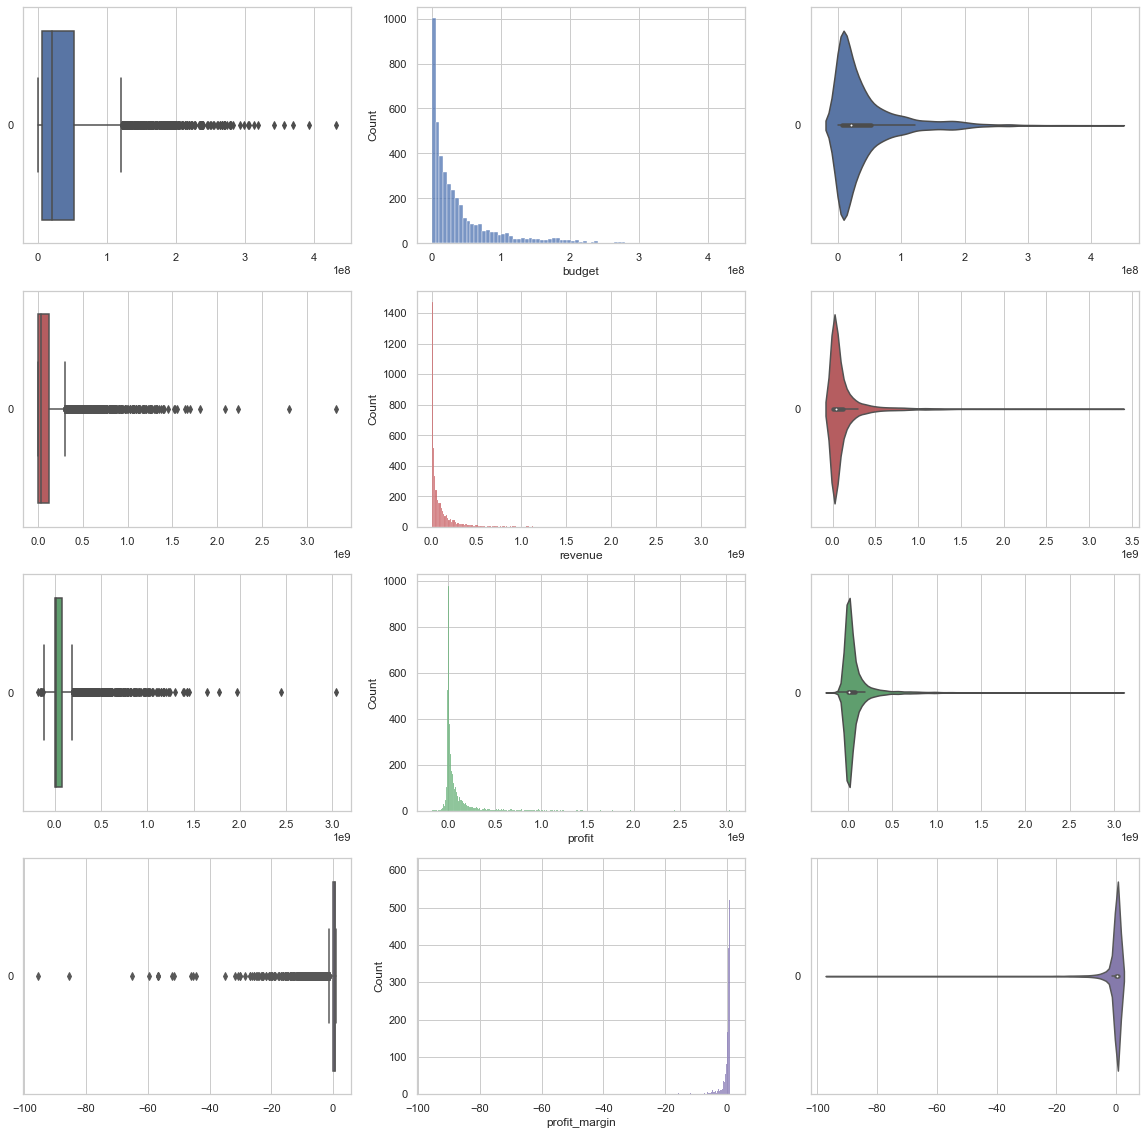

In [87]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(4, 3, figsize=(20, 20))

var = ['budget', 'revenue', 'profit', 'profit_margin']
crs = ["b", "r", "g", "m"]

for index, i in enumerate(var):
    # Plot the basic uni-variate figures for SalePrice
    sb.boxplot(data = df_mov[i], orient = "h", ax = axes[index,0], color = crs[index])
    sb.histplot(data = df_mov[i], ax = axes[index,1], color = crs[index])
    sb.violinplot(data = df_mov[i], orient = "h", ax = axes[index,2], color = crs[index])

#### Based on a visual observation we noted the following:
- The Data for Budget, Revenue, Profit and Profit_Margin are severly skewed, however this is normal for real world
- Most Films are produced with a Budget of < 70 millions

### Correlation Analysis - Budget vs Profit - Profitable Movies

Text(0, 0.5, 'Profit (Billions of Dollar)')

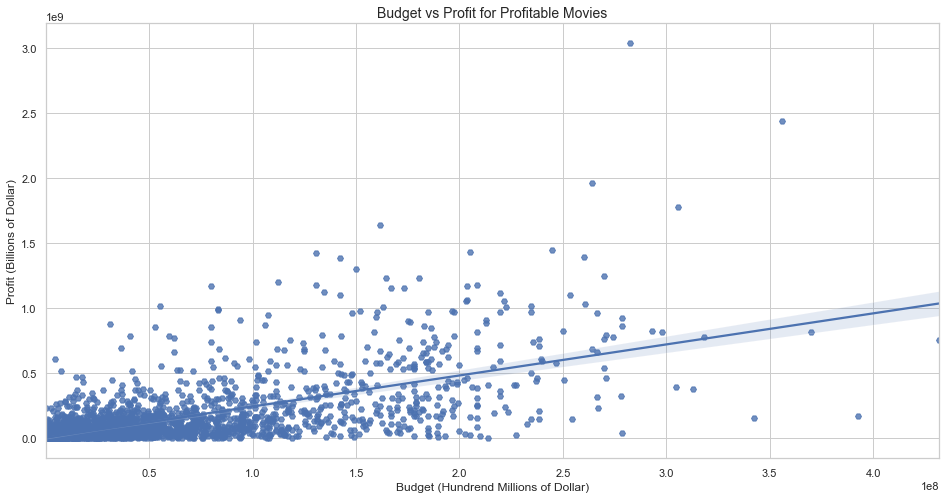

In [88]:
# Profitable Filter
df_profitable = df_mov[df_mov['profit'] > 0]

f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.regplot(data = df_profitable, x = df_profitable['budget'], y = df_profitable['profit'], truncate = True, fit_reg = True, marker = 'H')
axes.set_title("Budget vs Profit for Profitable Movies", fontsize = 14)
axes.set_xlabel("Budget (Hundrend Millions of Dollar)")
axes.set_ylabel("Profit (Billions of Dollar)")

#### Based on a visual observation we noted the following:
- There is a decent positive correlation between Budget and Profit.

### Correlation Analysis - Budget vs Profit Margin - Profitable Movies

Text(0, 0.5, 'Profit Margin')

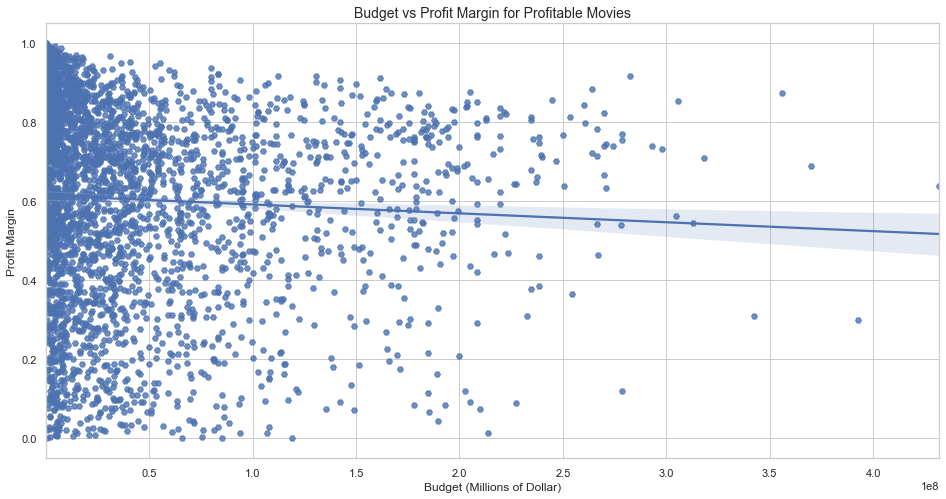

In [89]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))

sb.regplot(data = df_profitable, x = df_profitable['budget'], y = df_profitable['profit_margin'], 
           truncate = True, fit_reg = True,  marker = 'H')

axes.set_title("Budget vs Profit Margin for Profitable Movies", fontsize = 14)
axes.set_xlabel("Budget (Millions of Dollar)")
axes.set_ylabel("Profit Margin")

#### Based on a visual observation we noted the following:
- The Profit Margin tend to decrease when Budget increases
- Most Movie are produced with lower budget

### Conclusion
- A Larger Production Budget tend to receive a Larger Profit, however as Budget increases the Profit Margin decreases.
- Hence, if one company is to produce a Film, they should limit their Budget to the minimum.
- Budget could be a predictor for Profit

In [44]:
# Prevent Memory Hogging
del df_profitable

## Q3: When is an optimal Month/ Day to release a Film's Profit?
- Visual Analysis - Monthly Profit Distribution
- Visual Analysis - Profit Distribution of Released Day

### Visual Analysis - Monthly Profit Distribution

Text(0, 0.5, 'Profit (Tens Million)')

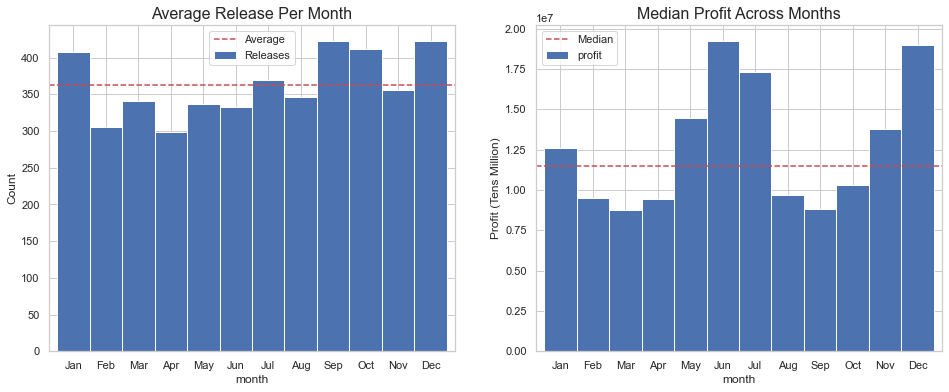

In [45]:
Month_Rev_DF = (df_mov.groupby(['month']).median().round(0).loc[:, 'profit']).reset_index()
Month_Release_DF = df_mov.groupby(['month']).count().loc[:, 'id'].reset_index()

f, axes = plt.subplots(1, 2, figsize=(16, 6))

# Movies released across months
Month_Release_DF.plot.bar(x= 'month', y ='id', ax = axes[0], width = 1, rot = 0)
axes[0].axhline(df_mov.groupby(['month']).count().mean().round(0)['id'], color='r', linestyle='--', label = 'Average')
axes[0].legend(["Average", "Releases"])
axes[0].set_title("Average Release Per Month", fontsize = 16)
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
axes[0].set_ylabel("Count")

# Average Revenue across months
Month_Rev_DF.plot.bar(x= 'month', y ='profit', ax = axes[1], width = 1)
axes[1].axhline(Month_Rev_DF['profit'].median(), color='r', linestyle='--', label = 'mean')
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
axes[1].legend(["Median", "profit"])
axes[1].set_title("Median Profit Across Months", fontsize = 16)
axes[1].set_ylabel("Profit (Tens Million)")

#### Based on a visual observation we noted the following:
* Jan, Sep, Oct and Dec have the Highest Number of Released Films. Perhaps, it could be due to Holiday Season
* Despite that, Films released Jun, Jul and Dec fetches higher Profit.

### Visual Analysis - Profit Distribution of Released Day

Text(0, 0.5, 'Revenue (Hundred Million)')

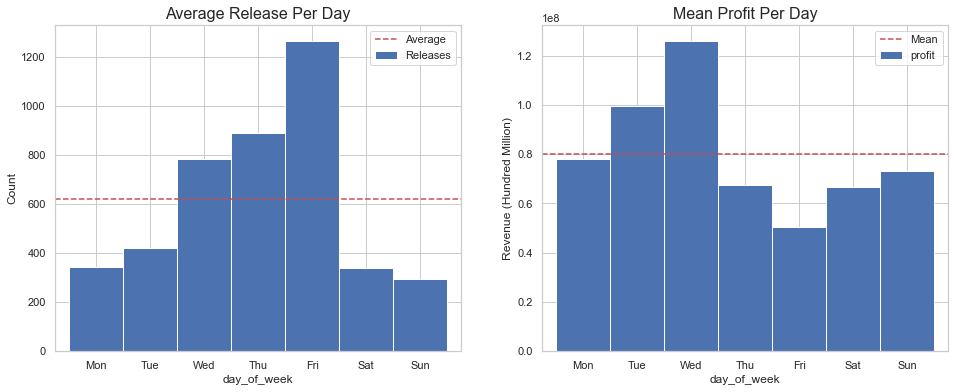

In [46]:
weekday_Rev_DF = (df_mov.groupby(['day_of_week']).mean().round(0).loc[:, 'profit']).reset_index()
weekday_Release_DF = df_mov.groupby(['day_of_week']).count().loc[:, 'id'].reset_index()

f, axes = plt.subplots(1, 2, figsize=(16, 6))

# Movies released across months
weekday_Release_DF.plot.bar(x= 'day_of_week', y ='id', ax = axes[0], width = 1, rot = 0)
axes[0].axhline(df_mov.groupby(['day_of_week']).count().mean().round(0)['id'], color='r', linestyle='--', label = 'Average')
axes[0].legend(["Average", "Releases"])
axes[0].set_title("Average Release Per Day", fontsize = 16)
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
axes[0].set_ylabel("Count")

# Average Revenue across months
weekday_Rev_DF.plot.bar(x = 'day_of_week', y ='profit', ax = axes[1], width = 1,  rot=0)
axes[1].axhline(weekday_Rev_DF['profit'].mean(), color='r', linestyle='--', label = 'mean')
axes[1].legend(["Mean", "profit"])
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
axes[1].set_title("Mean Profit Per Day", fontsize = 16)
axes[1].set_ylabel("Revenue (Hundred Million)")

#### Based on a visual observation we noted the following:
- Most Films are released on Thursday and Friday, probably to leverage on the weekend sales.
- However, the Highest Profit tend to be on Tuesday & Wednesday, perhaps due to the lack of competition.

### Conclusion:
1. The optimal release months would be June-July, December respectively.
2. This could be due to the low of competition during these period.
3. There could be a correlation between Profit and Release Date

However, do note that Higher Profit Mean doesn't translate to Profitability, as more Block Bluster Films could be released during these months/days leading to higher overall profit.
There are more EDA to be done.

In [47]:
# Prevent Memory Hogging
del Month_Release_DF
del weekday_Release_DF
del weekday_Rev_DF

## Q4. What are the popular Genres for a Profitable Film?
- Visual Analysis - Types of Movie Genres
- Heat Map - Dual Genre Combination
- Visual Analysis - Average Profit By Genre Combination (Top Ten and Bottom Ten)
- Visual Analysis - Average Profit Margin By Genre Combination (Top Ten and Bottom Ten)
- Visual Analysis - Ratings of Top 10 and Bottom 10 Net Profit Genre Combination

### Visual Analysis - Types of Movie Genre Combination

<AxesSubplot:xlabel='count', ylabel='genre_2'>

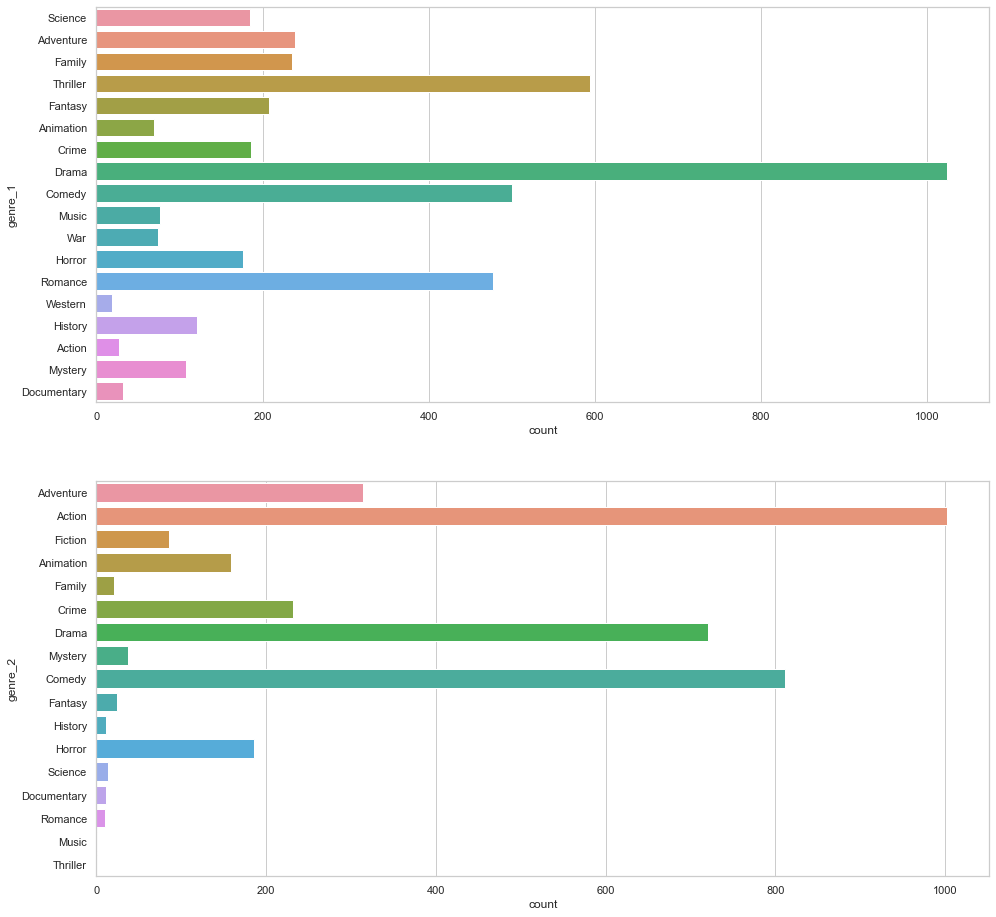

In [48]:
f, axes = plt.subplots(2,1, figsize=(16, 16))
sb.countplot(y = df_mov['genre_1'], ax = axes[0])
sb.countplot(y = df_mov['genre_2'], ax = axes[1])

#### Based on a visual observation we noted the following:
- There are many Films that centres around Drama, Action, Comedy and Thriller

### Dual Genre Movies Heat Map

Movies with one genre : 711
Movies with two genres : 3640


<AxesSubplot:xlabel='genre_2', ylabel='genre_1'>

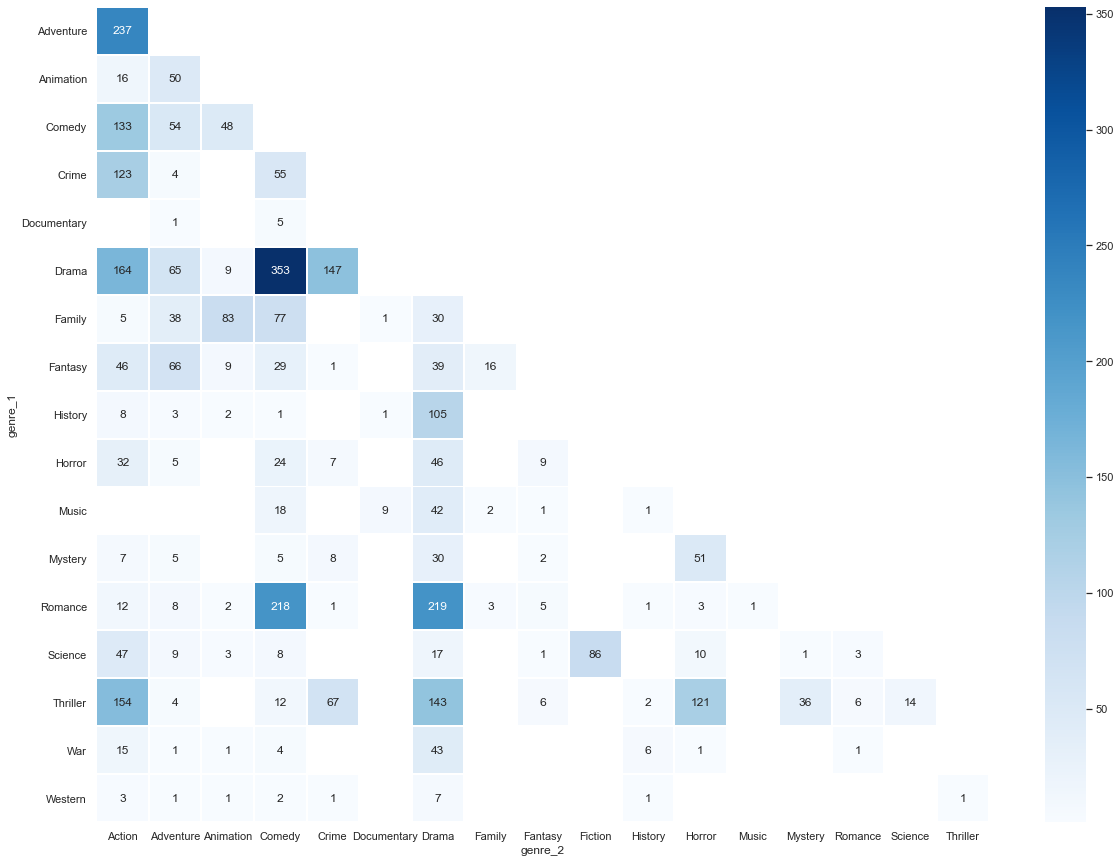

In [49]:
# Pokemons with Dual Types -- I and II
singletype_data = df_mov[df_mov["genre_2"].isnull() == True]
dualtype_data = df_mov[((df_mov["genre_2"].isnull() == False))]

print("Movies with one genre :", len(singletype_data))
print("Movies with two genres :", len(dualtype_data))

# Distribution of the Two Genres
f = plt.figure(figsize=(20, 15))
sb.heatmap(dualtype_data.groupby(['genre_1', 'genre_2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 12}, cmap = "Blues", fmt = '.0f')

#### Based on a visual observation we noted the following:
- Single Genre Movie are the minority with a Ratio of 1:5.
- The most popular Genre Combination are Comedy & Drama, followed by Action & Adventure and Comedy & Romance.
- Comedy Genre is dominating in terms of Most Released Genre Type.

### Visual Analysis - Average Profit By Genre Combination (Top Ten and Bottom Ten)

Text(0.5, 1.0, 'Average Profit By Genre Combination')

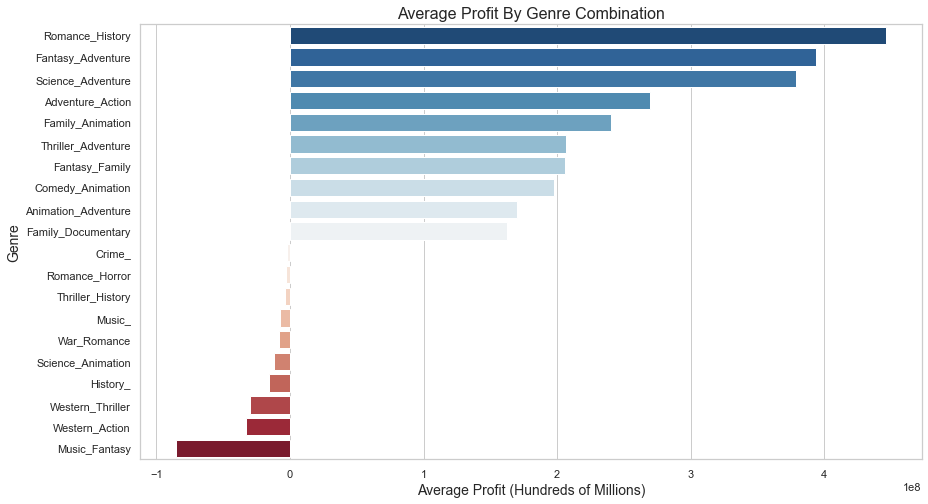

In [50]:
# Check out the Profit for each genre combination / standalone
df_mov['genre_combo'] = df_mov['genre_1'] + "_" + df_mov['genre_2'].fillna('')
profit_combo_genre = df_mov.groupby('genre_combo', as_index=False)[['profit']].mean().sort_values(by='profit', ascending=False)

# Truncate data into Top Ten and Bottom Ten, as there are too many data in between
truncated = profit_combo_genre.iloc[np.r_[0:10, len(profit_combo_genre) - 11: len(profit_combo_genre) - 1], :]

# Plot
f = plt.figure(figsize=(14, 8))
sb.barplot(x = truncated['profit'], y = truncated['genre_combo'], palette='RdBu_r')
plt.xlabel('Average Profit (Hundreds of Millions)', fontsize=14)
plt.ylabel('Genre', fontsize = 14)
plt.title('Average Profit By Genre Combination', fontsize=16)

In [51]:
print("Number of Films Released in the Top Genres Released:")
print("No. Romance History Film", len(df_mov[df_mov['genre_combo'] == 'Romance_History']['title']))
print("No. Fantasy Adventure Film", len(df_mov[df_mov['genre_combo'] == 'Fantasy_Adventure']['title']))
print("No. Science Adventure Film", len(df_mov[df_mov['genre_combo'] == 'Science_Adventure']['title']))

Number of Films Released in the Top Genres Released:
No. Romance History Film 1
No. Fantasy Adventure Film 66
No. Science Adventure Film 9


#### Based on a visual observation we noted the following:
- Although Comedy is the most Released Genre, it is lacking behind Adventure Type Films.
- Single Genre Films are also observed to have **Lower Avg Profit** than Dual Genre Films.
- Next, although Romance & History takes the highest Avg Profit, there is only 1 Film Released compared to the 2nd, 
- Lastly, the worst profit films are Western & History and Music Fantasy Films.

### Visual Analysis - Average Profit Margin By Genre Combination (Top Ten and Bottom Ten)

Text(0.5, 1.0, 'Average Profit Margin By Genre Combination')

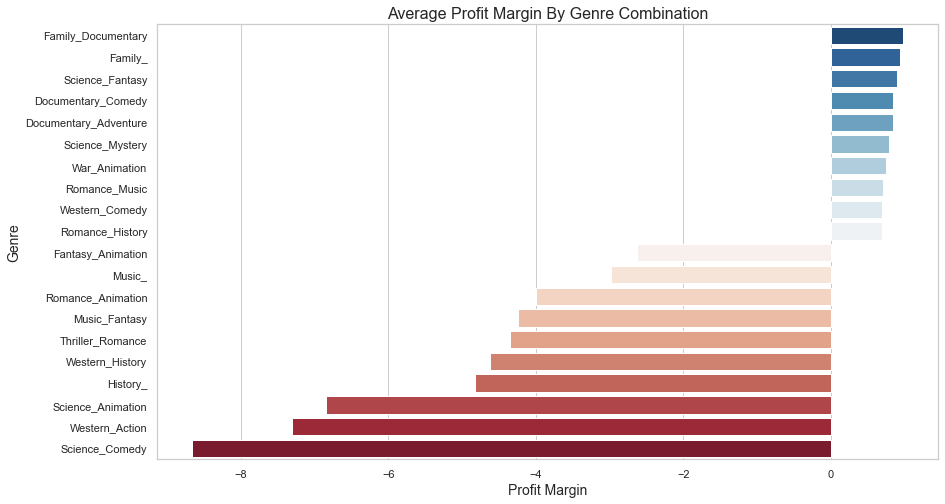

In [52]:
# Check out the Profit for each genre combination / standalone
margin_combo_genre = df_mov.groupby('genre_combo', as_index=False)[['profit_margin']].mean().sort_values(by='profit_margin', ascending=False)

# Truncate data into Top Ten and Bottom Ten, as there are too many data in between
truncated = margin_combo_genre.iloc[np.r_[0:10, len(margin_combo_genre) - 11: len(margin_combo_genre) - 1], :]

# Plot
f = plt.figure(figsize=(14, 8))
sb.barplot(x = truncated['profit_margin'], y = truncated['genre_combo'], palette='RdBu_r')
plt.xlabel('Profit Margin', fontsize=14)
plt.ylabel('Genre', fontsize = 14)
plt.title('Average Profit Margin By Genre Combination', fontsize=16)

#### Based on a visual observation we noted the following:
1. The Highest Average Profit Films are not the Highest in Profit Margin
2. Most Films Profitable Films' Margin are low
3. Focus on Documentary type Movie for safer Profit Margin.

### Visual Analysis - Ratings of Top 10 and Bottom 10 Net Profit Genre Combination

Text(0.5, 1.0, 'Ratings of Bottom 10 Genre Combination')

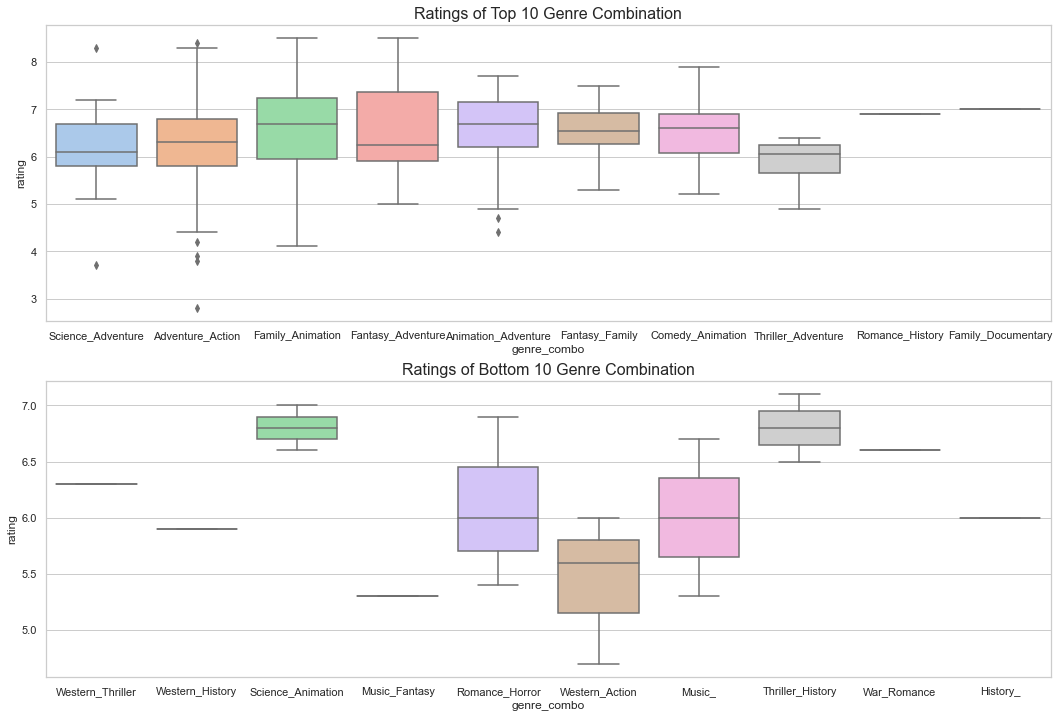

In [53]:
f, axes = plt.subplots(2, 1, figsize =(18, 12))
g_profit_rating = df_mov[df_mov['genre_combo'].isin(profit_combo_genre[:10]['genre_combo'].to_list())]
pop = sb.boxplot(x = 'genre_combo', y = 'rating', data = g_profit_rating, ax = axes[0], palette = sb.color_palette('pastel'))
axes[0].set_title("Ratings of Top 10 Genre Combination", fontsize = 16)

b_profit_rating = df_mov[df_mov['genre_combo'].isin(profit_combo_genre[-10:]['genre_combo'].to_list())]
pop = sb.boxplot(x = 'genre_combo', y = 'rating', data = b_profit_rating, ax = axes[1], palette = sb.color_palette('pastel'))
axes[1].set_title("Ratings of Bottom 10 Genre Combination", fontsize = 16)

#### Based on a visual observation we noted the following:
- The Average Rating for Top Ten Combination of Genres hovers above 6.
- Meanwhile, the Average Rating for Bottom Ten Combination varies greatly

### Conclusion
1. High Average Profit doesn't necessary means High Profit Margin, while Low Profit Documentary Film tend to have a higher Profit Margin.
2. For Safer Approach, Documentary is the go to, while Western History, Thriller are to be avoided as both their Profit and Margin are the lowest.

In [54]:
# Prevent Memory Hogging
del singletype_data, dualtype_data
del g_profit_rating, b_profit_rating
del margin_combo_genre, profit_combo_genre, truncated

## Q5. Does the Popularity and Ratings of a Film correlate with Profitability
* Visual Analysis - Profitability vs Popularity
* Visual Analysis - Profitability vs Rating

### Visual Analysis - Profitability vs Popularity

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

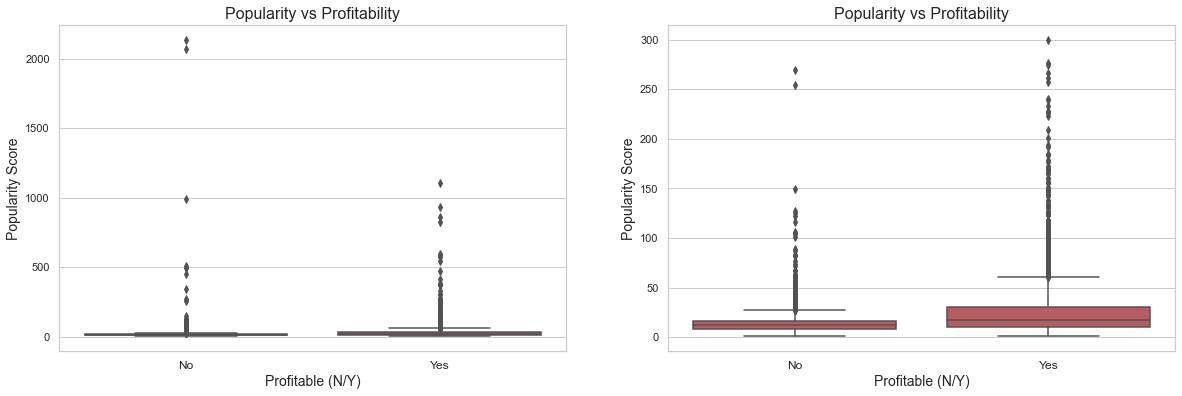

In [55]:
f, axes = plt.subplots(1, 2, figsize =(20, 6))
pop = sb.boxplot(x = 'profitable', y = 'popularity', data = df_mov, color = 'r', ax = axes[0])
pop.axes.set_title("Popularity vs Profitability", fontsize = 16)
pop.axes.set_ylabel("Popularity Score", fontsize = 14)
pop.axes.set_xlabel("Profitable (N/Y)", fontsize = 14)
pop.axes.set_xticklabels(['No', 'Yes'], rotation=0, fontsize = 12)

pop_limit = sb.boxplot(x = 'profitable', y = 'popularity', data = df_mov[df_mov['popularity'] <= 300], color = 'r', ax = axes[1])
pop_limit.axes.set_title("Popularity vs Profitability", fontsize = 16)
pop_limit.axes.set_ylabel("Popularity Score", fontsize = 14)
pop_limit.axes.set_xlabel("Profitable (N/Y)", fontsize = 14)
pop_limit.axes.set_xticklabels(['No', 'Yes'], rotation=0, fontsize = 12)

#### Based on a visual observation we noted the following:
- There are too many outliners for Popularity, so we have to set a limit of popularity (300) for better observation
- After Shaving off the initial Outliners, Films with higher Popularity Score seem to be a little Profitable.

### Visual Analysis - Profitability vs Rating

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

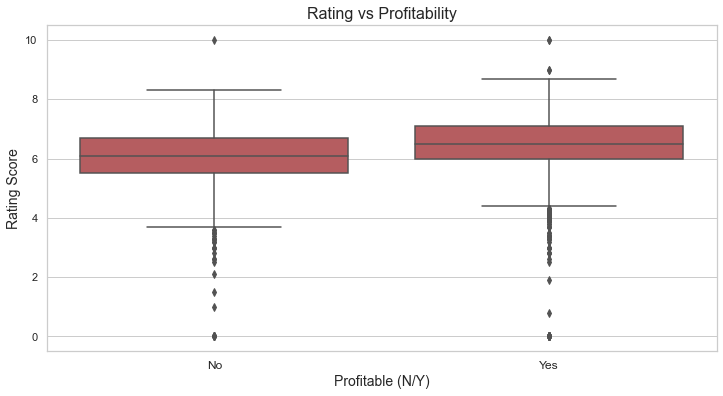

In [56]:
f = plt.figure(figsize=(12, 6))
pop = sb.boxplot(x = 'profitable', y = 'rating', data = df_mov, color = 'r')
pop.axes.set_title("Rating vs Profitability", fontsize = 16)
pop.axes.set_ylabel("Rating Score", fontsize = 14)
pop.axes.set_xlabel("Profitable (N/Y)", fontsize = 14)
pop.axes.set_xticklabels(['No', 'Yes'], rotation=0, fontsize = 12)

#### Based on a visual observation we noted the following:
- Ratings of Profitable Films is alittle higher than Ratings of non-Profitable Films.

### Conclusion
* Popularity could be a weak indicator of a Film's Profitability
* Meanwhile, Rating does not appear to have any correlation with Profitability

## Q6. Does the Duration of a Film affects it's Profitability.
* Distributon of Film's Runtime
* Visual Analysis -  Films Runtime Mean Profit based on Duration and Year Interval of 2

Text(0.5, 0, 'Run Time (min)')

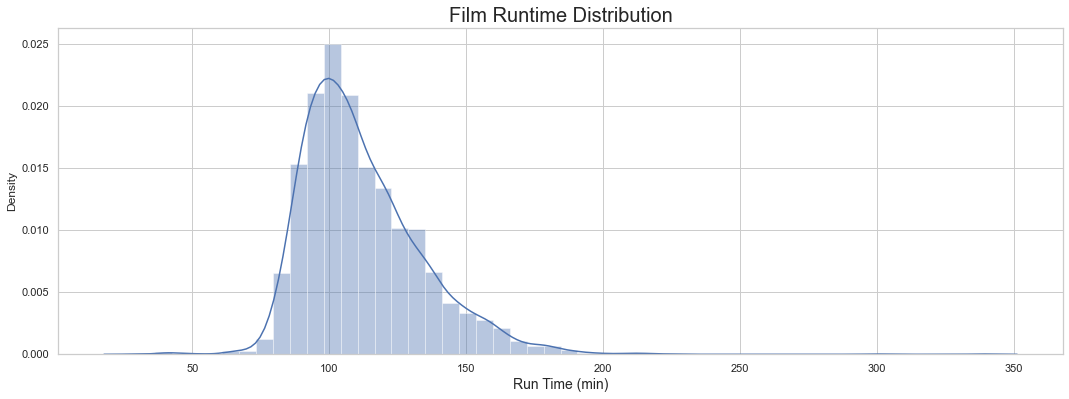

In [57]:
plt.figure(figsize = (18, 6))
den = sb.distplot(df_mov['runtime'])
den.axes.set_title("Film Runtime Distribution", fontsize = 20)
den.set_xlabel("Run Time (min)", fontsize = 14)

In [58]:
df_mov['runtime'].describe()

count    4351.000000
mean      111.934957
std        21.929179
min        30.000000
25%        96.000000
50%       108.000000
75%       123.000000
max       339.000000
Name: runtime, dtype: float64

Films will be classified to Short, Medium and Long according to the following critieria: <br><br>
`Short  `: `< 96 mins` <br>
`Medium`: `96 ~ 123 mins` <br>
`Long`  : `> 123mins`

### Visual Analysis -  Films Runtime Mean Profit based on Duration and Year Interval

In [59]:
# Group by Run Time
df_short = df_mov.query('runtime < 96').groupby('year')[['profit']].mean().round().reset_index()
df_med = df_mov.query('(runtime >= 96) & (runtime <= 123)').groupby('year')[['profit']].mean().round().reset_index()
df_long = df_mov.query('(runtime > 123)').groupby('year')[['profit']].mean().round().reset_index()

In [60]:
# Gross Revenue: Interval of 2 Years
def convert_2year_inter(df):
    turns = int((2020 - 2000) / 2)
    dicit = []
    for i in range(turns):
        start = 2 * i
        sums = int(df[start: start + 2]['profit'].mean())
        dicit.append({"year": int(df.iloc[start]['year']), "profit": sums})
    return (pd.DataFrame(dicit)).astype('int')

df_short_p = convert_2year_inter(df_short)
df_med_p = convert_2year_inter(df_med)
df_long_p = convert_2year_inter(df_long)

In [61]:
# Bar Interval Width
ind2 = np.arange(len(df_short_p))
width = 0.3
np.repeat(df_mov.profit.mean(), 10)

array([77276094.11330493, 77276094.11330493, 77276094.11330493,
       77276094.11330493, 77276094.11330493, 77276094.11330493,
       77276094.11330493, 77276094.11330493, 77276094.11330493,
       77276094.11330493])

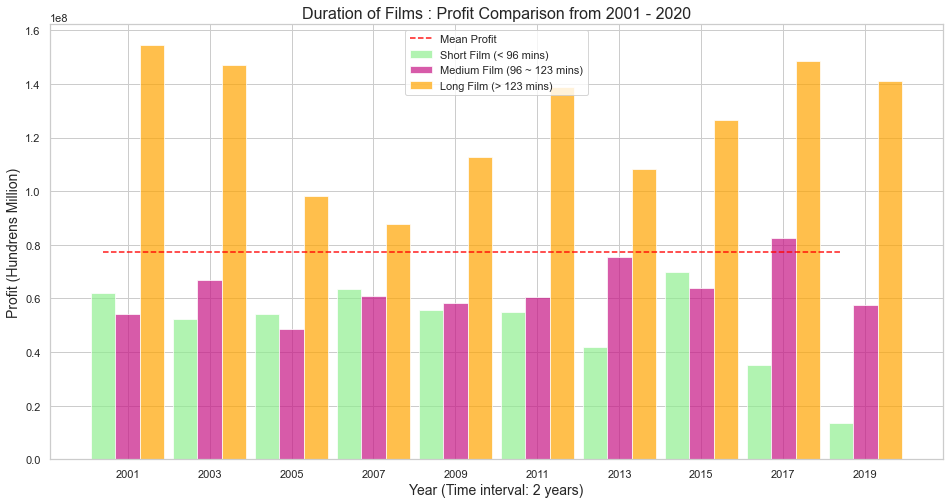

In [62]:
plt.figure(figsize=(16, 8))

# Plot the bars and the line
short = plt.bar(ind2, df_short_p['profit'], width, color = '#90EE90', alpha=.7, label='Short Film (< 96 mins)')
med = plt.bar(ind2 + width, df_med_p['profit'], width, color = '#C71585', alpha=.7, label='Medium Film (96 ~ 123 mins)')
long = plt.bar(ind2 + 2 * width, df_long_p['profit'], width, color = 'orange', alpha=.7, label='Long Film (> 123 mins)')
plt.plot(ind2, np.repeat(df_mov.profit.mean(), 10), '--', color = 'red',  alpha= .9, label='Mean Profit')

# Plot the labels, xticks and title
plt.ylabel('Profit (Hundrens Million)', fontsize = 14)
plt.xlabel('Year (Time interval: 2 years)', fontsize = 14)
plt.title('Duration of Films : Profit Comparison from 2001 - 2020', fontsize = 16)
plt.xticks(ind2 + width, df_short_p['year'])

# set the legend
plt.legend()

#### Based on a visual observation we noted the following:
- Long Film (> 123 mins) tend to fetch Higher Profit
- This phenomenon can be observed since early 2000s, having a parabola effect to 2020.
- However, it could also be that Longer Runtime tend to have a Larger Budget which led to Higher Profit.

### Conclusion:
1. Long Film are recommended to be Produced based on their Profit.
2. Run Time could be a predictor for Profitability.

## Q7. How does the Cast, Director and Production Studio affects the Profitability of a Film
* Correlation Analysis - Average Casting VARs with Profit 
* Correlation Analysis - Director VARs with Profit
* Correlation Analysis - Production Studio VARs with Profit
* Visual Analysis - Names of Production, Cast, Director with High VAR

Our Team uses VARs to analysis the correlation between Attributes and Profit
VAR = Value Above Replacement. For example, the Director_VAR is calculated by taking the Average Profit of all his/her Films over the Average Profit of the Dataset. By doing so, we find out the Cast, Director and Production stands in the Film Industry

In [63]:
cast_dir_prod = df_mov[['avg_cast_var', 'director_var', 'production_var', 'profit']]

### Correlation Analysis -  Average Casting VARs with Profit

Text(0, 0.5, 'Profit (Billions of Dollar)')

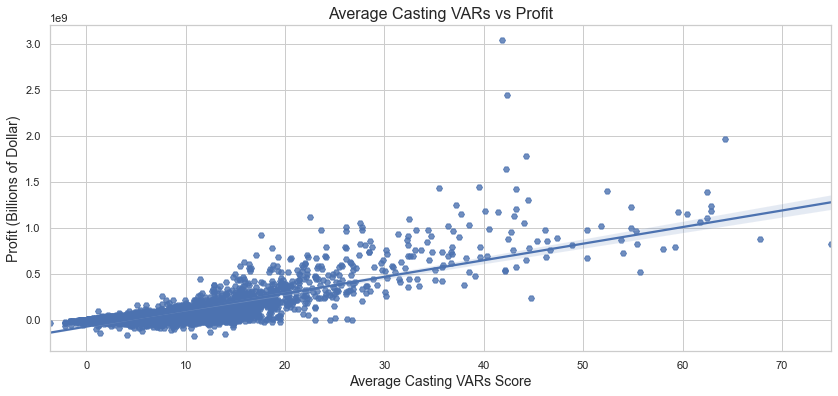

In [64]:
f, axes = plt.subplots(1, 1, figsize=(14, 6))
sb.regplot(x = cast_dir_prod['avg_cast_var'], y = cast_dir_prod['profit'], truncate = True, fit_reg = True, marker = 'H')
axes.set_title("Average Casting VARs vs Profit", fontsize = 16)
axes.set_xlabel("Average Casting VARs Score", fontsize = 14)
axes.set_ylabel("Profit (Billions of Dollar)", fontsize = 14)

#### Based on a visual observation we noted the following:
- There is a strong linear relationship between Avg Casting VARs and Profit fetched.

### Correlation Analysis -  Director VARs with Profit

Text(0, 0.5, 'Profit (Billions of Dollar)')

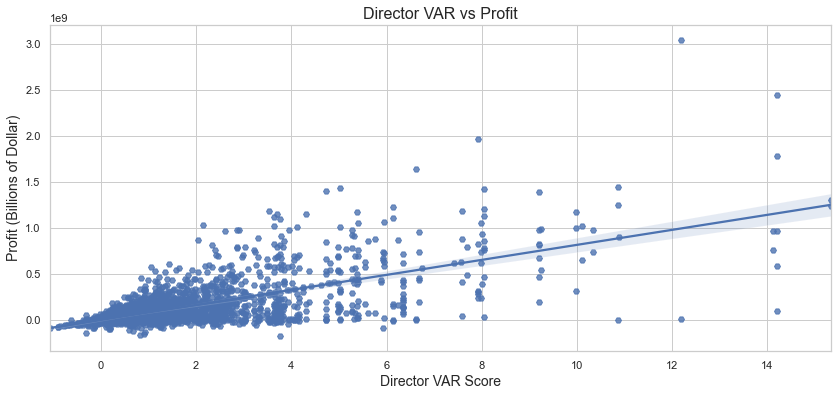

In [65]:
f, axes = plt.subplots(1, 1, figsize=(14, 6))
sb.regplot(x = cast_dir_prod['director_var'], y = cast_dir_prod['profit'], truncate = True, fit_reg = True, marker = 'H')
axes.set_title("Director VAR vs Profit", fontsize = 16)
axes.set_xlabel("Director VAR Score", fontsize = 14)
axes.set_ylabel("Profit (Billions of Dollar)", fontsize = 14)

#### Based on a visual observation we noted the following:
- There is a strong linear relationship between Director VARs and Profit fetched.

### Correlation Analysis -  Production Studio VARs with Profit

Text(0, 0.5, 'Profit (Billions of Dollar)')

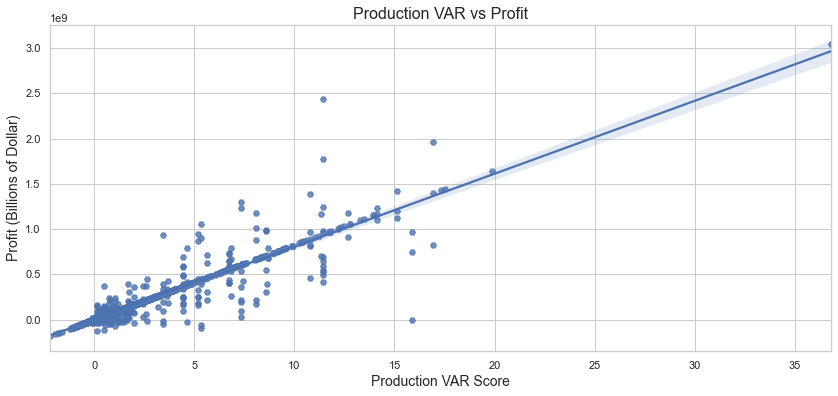

In [66]:
f, axes = plt.subplots(1, 1, figsize=(14, 6))
sb.regplot(x = cast_dir_prod['production_var'], y = cast_dir_prod['profit'], truncate = True, fit_reg = True, marker = 'H')
axes.set_title("Production VAR vs Profit", fontsize = 16)
axes.set_xlabel("Production VAR Score", fontsize = 14)
axes.set_ylabel("Profit (Billions of Dollar)", fontsize = 14)

#### Based on a visual observation we noted the following:
- There is a very strong linear relationship between Production VARs and Profit fetched.

### Visual Analysis - Names of Production, Cast, Director with High VAR

In [67]:
# Set to beyond 2000s
df_cast = df_cast[df_cast['year'] > 2000]
df_prod = df_prod[df_prod['year'] > 2000]
df_dir = df_dir[df_dir['year'] > 2000]

In [68]:
prod_names = df_prod.reset_index().sort_values('production_var', ascending = False)[:5]

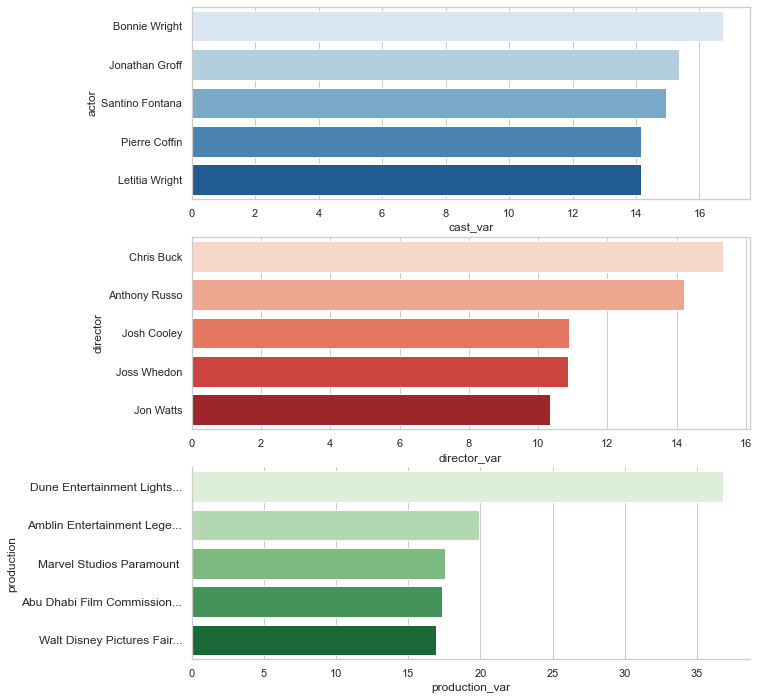

In [69]:
f, axes = plt.subplots(3, 1, figsize = (10, 12))

sb.barplot(data = df_cast.reset_index().sort_values('cast_var', ascending = False)[:5], 
           y = 'actor', x = 'cast_var',  palette = 'Blues', ax = axes[0])
sb.despine(ax= axes[2],trim= False)
sb.barplot(data = df_dir.reset_index().sort_values('director_var', ascending = False)[:5], 
           y = 'director', x = 'director_var',  palette = 'Reds', ax = axes[1])

sb.barplot(data = df_prod.reset_index().sort_values('production_var', ascending = False)[:5], 
           y = 'production', x = 'production_var',  palette = 'Greens', ax = axes[2])

#Truncate Production Label
y_prod_tick = []
for names in prod_names.production:
    if len(names) > 25:
        y_prod_tick.append(names[:25] + '...')
    else:
        y_prod_tick.append(names)
        
c = axes[2].set_yticklabels(y_prod_tick, fontsize = 12)

### Conclusion
1. The VAR of Cast, Director and Production are strong predictor of a Film's Profit.
2. If one is to produce a Film, they should find a Production Studio with high VAR which translate to their good track record

In [70]:
# Prevent Memory Hogging
del df_cast, df_prod, actors_list, cast_dir_prod, df_dir

## 4 Machine Learning
* Based on our Exploratory Observation, we will be using Logistic Regression Model to Predict whether a Movie will be `Profitable` based on attributes that are only available prior to it's release.
* The Attributes: `Budget`, `Popularity`, `Avg_Cast_Var`, `Director_Var`, `Production_Var`, `Day_Of_Week`, `Month`, `genre_combo`, `Run Time`

### Visual Analysis - Proportion of Profitable Films

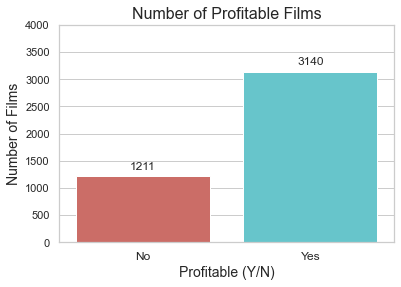

In [71]:
f, axes = plt.subplots(1,1, figsize = (6,4))

splot = sb.countplot(x = 'profitable', data = df_mov, palette = 'hls', ax = axes)
splot.set(ylim=(0, 4000))
axes.set_ylabel("Number of Films", fontsize = 14)
axes.set_xlabel("Profitable (Y/N)", fontsize = 14)
axes.set_xticklabels(['No', 'Yes'], rotation=0, fontsize = 12)
axes.set_title("Number of Profitable Films", fontsize = 16)

# Numbers
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [72]:
print("Proportion of unprofitable films:", (len(df_mov[df_mov['profitable'] == 0]) / len(df_mov)), '%')
print("Proportion of   profitable films:", (len(df_mov[df_mov['profitable'] == 1]) / len(df_mov)), ' %')

Proportion of unprofitable films: 0.27832682142036314 %
Proportion of   profitable films: 0.7216731785796369  %


#### Based on a visual observation we noted the following:
- Our classes are imbalanced, the current ratio of unprofitable to profitable is 28:71.

### Generating Dummy Variables for Categorical Data for Logistic Regression Model
* Reference Level: `day_of_week_fri`, `month_apr`, `genre_combo_Action`

In [73]:
df_mov['day_of_week'] = df_mov['day_of_week'].map(secret_lab.return_day)
df_mov['day_of_week'] = df_mov['day_of_week'].astype("category")

df_mov['month'] = df_mov['month'].map(secret_lab.return_month)
df_mov['month'] = df_mov['month'].astype("category")

In [74]:
attr = ['budget','popularity','avg_cast_var','director_var', 'day_of_week', 'month', 'genre_combo', 
        'production_var', 'runtime', 'profitable']

df_final = pd.get_dummies(df_mov[attr], columns = ['day_of_week', 'month', 'genre_combo'], drop_first = True)

numeric_cols = ['budget','popularity','avg_cast_var','director_var', 'production_var', 'runtime']

cat_cols = list(set(df_final.columns) - set(numeric_cols) - {'profitable'})

print("Shape of Dummy:", df_final.shape)

Shape of Dummy: (4351, 141)


### Train-Test-Split with Stratify
* Maintains the Ratio of unprofitable/profitable within Train and Test -> Tackle the imbalance data

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Independant Variables: Observed Attributes
X = df_final.loc[:, df_final.columns != 'profitable']

# Dependant Variable: Profit
y = df_final.loc[:, df_final.columns == 'profitable']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)
print()
print("Ratio of Profitable/Un-Profitable in Train: ",y_train['profitable'].value_counts()[0], y_train['profitable'].value_counts()[1])
print("Ratio of Profitable/Un-Profitable in Test : ",y_test['profitable'].value_counts()[0], y_test['profitable'].value_counts()[1])

Train Shape: (3263, 140)
Test Shape: (1088, 140)

Ratio of Profitable/Un-Profitable in Train:  908 2355
Ratio of Profitable/Un-Profitable in Test :  303 785


### Transform Numerical Variable: Standardising
* Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
* Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 

In [76]:
from sklearn.preprocessing import StandardScaler
# Set-up of Standardise Scaler -> Apply to Numeric Data
scaler =  StandardScaler().fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

# Sanity Check
X_train.std()

budget                          1.000153
popularity                      1.000153
avg_cast_var                    1.000153
director_var                    1.000153
production_var                  1.000153
                                  ...   
genre_combo_Western_Comedy      0.000000
genre_combo_Western_Crime       0.017506
genre_combo_Western_Drama       0.046274
genre_combo_Western_History     0.017506
genre_combo_Western_Thriller    0.000000
Length: 140, dtype: float64

### Applying Recursive Feature Elimination Cross Validation (RFEVC)
> Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.
> - It allow us to obtain the `Features ranking` with recursive feature elimination and cross-validated selection of the best number of features.
> - Class Weight = `Balanced` in order to combat the inbalance in our Dataset.
> - Scoring Method = `Accuracy`
> - cross-validation generator (CV) = Number of Folds, in our case sklearn automatically use StratifiedKFold for Logistic Regression Models, allowing same ratio of unprofitable/profitable in each split.

In [77]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
#Logistic Regression Model
logreg_model = LogisticRegression(class_weight = 'balanced', random_state = 0)
rfecv = RFECV(estimator=logreg_model, step= 1, cv = 5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

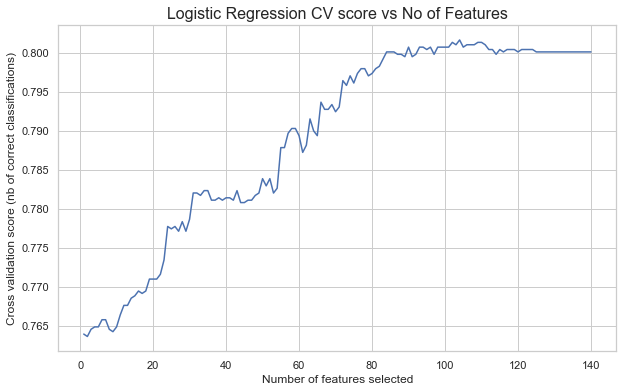

In [78]:
plt.figure(figsize = (10,6))
plt.title('Logistic Regression CV score vs No of Features', fontsize = 16)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [79]:
important_attr = list(zip(X_train.columns, rfecv.support_))

new_attr = []
for key,value in enumerate(important_attr):
    if(value[1]) == True:
        new_attr.append(value[0])

print("Number of Attributes:", rfecv.n_features_, '\n')
print("The New Attributes:")
print(new_attr)

Number of Attributes: 104 

The New Attributes:
['budget', 'popularity', 'avg_cast_var', 'director_var', 'production_var', 'runtime', 'day_of_week_Mon', 'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue', 'month_Aug', 'month_Dec', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'genre_combo_Animation_', 'genre_combo_Animation_Action', 'genre_combo_Comedy_', 'genre_combo_Comedy_Action', 'genre_combo_Comedy_Adventure', 'genre_combo_Crime_', 'genre_combo_Crime_Action', 'genre_combo_Crime_Adventure', 'genre_combo_Crime_Comedy', 'genre_combo_Documentary_', 'genre_combo_Documentary_Adventure', 'genre_combo_Documentary_Comedy', 'genre_combo_Drama_', 'genre_combo_Drama_Action', 'genre_combo_Drama_Adventure', 'genre_combo_Family_', 'genre_combo_Family_Adventure', 'genre_combo_Family_Animation', 'genre_combo_Family_Comedy', 'genre_combo_Family_Drama', 'genre_combo_Fantasy_Action', 'genre_combo_Fantasy_Adventure', 'genre_combo_Fantasy_Animation', 'genre_combo_Fantasy_Comedy'

### Comparing Accuracy Score - Cross Validation

In [80]:
from sklearn.model_selection import cross_validate
X_train_new = X_train[new_attr]
initial_score = cross_validate(logreg_model, X_train, y_train, cv = 5, scoring='accuracy')['test_score'].mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_validate(logreg_model, X_train_new, y_train, cv = 5, scoring='accuracy')['test_score'].mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.8001705202040605 
Accuracy after Feature Selection : 0.8023130619415817 


### Fitting the Logistic Regression Model

Accuracy of Logistic Regression Classifier on test set: 0.80


<AxesSubplot:>

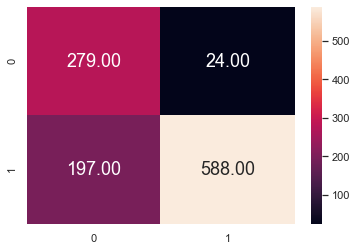

In [81]:
final_LR = LogisticRegression(class_weight = 'balanced', random_state = 0)
final_LR.fit(X_train_new, y_train)

# Transform X_Test Standardized
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Have the same attributes
X_test = X_test[new_attr]
y_pred = final_LR.predict(X_test)

print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(final_LR.score(X_test, y_test)))

sb.heatmap(confusion_matrix(y_test, y_pred), annot = True, annot_kws = {"size": 18}, fmt = '.2f')

### Classification Report 

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.92      0.72       303
           1       0.96      0.75      0.84       785

    accuracy                           0.80      1088
   macro avg       0.77      0.83      0.78      1088
weighted avg       0.86      0.80      0.81      1088



### Breakdown of Report:
* `Accuracy`: 0.80
* `Recall`: Our Model have high accurately identifying unProfitable Films (0.92) but weaker in identifying Profitable Films.
* `Precision`: However, Our Model is 0.96 right in predicting Profitable Film, which is what we want. As a False Positive is much more severe in Investment than True Negative. We would rather investor lose out on opportunity, than making the wrong investment and losing money.
* `Support`: The Ratio between Unprofitable - Profitable

### Receiver Operating Characteristic (ROC) curve
>The ROC curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

Text(0.5, 1.0, 'Precision Recall Curve')

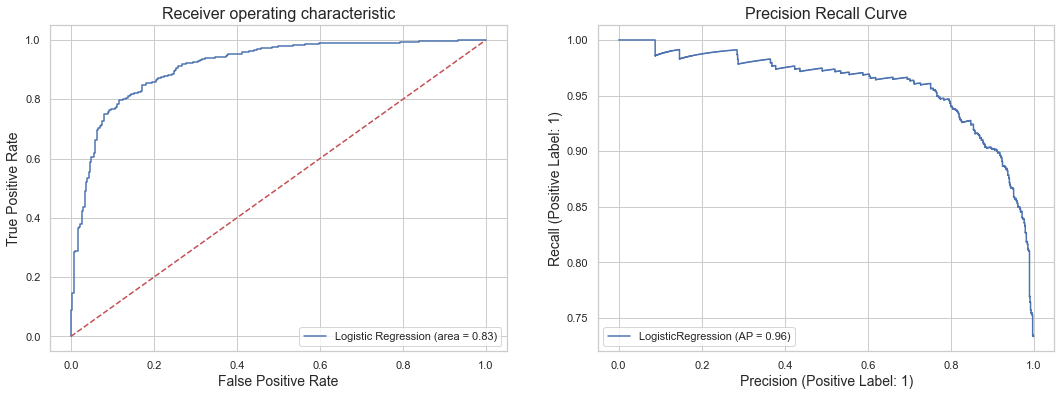

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, plot_precision_recall_curve

logit_roc_auc = roc_auc_score(y_test, final_LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, final_LR.predict_proba(X_test)[:,1])

f, axes = plt.subplots(1, 2, figsize = (18,6))

# ROC Curve
axes[0].plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
axes[0].plot([0, 1], [0, 1],'r--')
axes[0].set_xlabel('False Positive Rate', fontsize = 14)
axes[0].set_ylabel('True Positive Rate', fontsize = 14)
axes[0].set_title('Receiver operating characteristic', fontsize = 16)
axes[0].legend(loc="lower right")

# Precision Recall Curve
#axes[0].plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plot_precision_recall_curve(final_LR, X_test, y_test, ax= axes[1])
axes[1].set_xlabel("Precision (Positive Label: 1)", fontsize = 14)
axes[1].set_ylabel("Recall (Positive Label: 1)", fontsize = 14)
axes[1].set_title('Precision Recall Curve', fontsize = 16)

### Interpreting the Result

In [84]:
import IPython.display
coefs = {"Variable": new_attr, "Coefficient": final_LR.coef_[0]}
df_coef = pd.DataFrame(data = coefs, columns = ['Variable', "Coefficient"])
IPython.display.HTML(df_coef.to_html())

,Variable,Coefficient
0,budget,-0.853982
1,popularity,-0.299806
2,avg_cast_var,0.532002
3,director_var,0.438631
4,production_var,7.693367
5,runtime,0.280174
6,day_of_week_Mon,-0.167279
7,day_of_week_Sun,-0.314047
8,day_of_week_Thu,0.189285
9,day_of_week_Tue,-0.221630


### Explanation
* Categorical Attributes such as Genre, Month, Day_Of_Week, the odds ratio is to their respective Reference Data.
* Reference: day_of_week_fri, month_apr, genre_combo_Action_
<br>
* For Example, genre_combo_Family_Comedy is exp(1.055) -> 2.87x is to genre_combo_Animation_ in increasing odds of Profitability. 
* Meanwhile for Numerical Attributes are scaled by StandardScaler, we need to think of them in terms of Standard Deviation.
* For Example: For every standard deviation increase in avg_cast_var, there is an exp(0.532002) -> 1.69x increased in the odds of Profitability.

#### Based on a visual observation we noted the following:
* For **Numerical Data**, an investor should prioritise the `Production Studio`, `Casting`, `Director` followed by `Runtime`. Production Studio weights heavier than any other attributes. Meanwhile, the Budget should be kept at the bare minimum of Production, as there is an exp(-0.853) -> 42% odds of unprofitability for every Standard Deviation increase in Budget.
* For **Categorical Data**, the prime release date would be Thursday at Decemeber.
* Next, the best odds in Profitability Genres are Science & Adventure and Family & Comedy Genres while Thriller & Romanace and Thriller & History should be avoided.

### Conclusion

Through our Analysis, we have identified several key factors that has a larger impact on the film's profitability. Factors include having a huge will result in diminishing returns, the popular genres for past profitable film and the impact of Production Studio, Director & Cast on the film's proftiability. With all these analysis done, we utilised Logistics Regression Model to attempt to predcit a film's profitability and highlight varaibles that is available pre-production. These will aid the investor/ production team to focus on the factors that will generate profit.

Based on the Logistic Regression Model,we have identifed that to make a profitable movie, an investor should find:<br>
1. 1 of the top 5 production studios & director for the production. 
2. In addition, the length of the movie should also be more than >123 mins 
3. Next, the recommended grenes being Science & Adventure, Family & Comedy while Romance & Thriller and Thriller & History should be avoided. 
4. Even though pouring more budget may seems to reap a higher profit, it is however, counter intittuive. We recommend that the budget be kept to the minimum to maximise profit margin on every dollar spent. 
6. Lastly, based on the model we would recommend release date to be on a Thursday and Decemeber. 

These are the factors indentified by the logistic regression model to be most influential in making a profitable movie.

### References
1. https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions
2. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
3. https://medium.com/analytics-vidhya/adjusting-for-inflation-when-analysing-historical-data-with-python-9d69a8dcbc27
4. https://github.com/YashMotwani/TMDB-Movies-Dataset-Investigation-/blob/master/TMDB_Movies_Dataset_Analysis.ipynb
5. https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c
6. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
7. https://github.com/jeremy-lee93/dsc-mod-1-project-v2-1-onl01-dtsc-pt-052620
8. https://www.justintodata.com/logistic-regression-example-in-python/
9. https://stats.stackexchange.com/questions/463690/multiple-regression-with-mixed-continuous-categorical-variables-dummy-coding-s
10. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_precision_recall_curve.html
11. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
12. https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

### Thank you for looking through our notebook!